<a href="https://colab.research.google.com/github/eshaandinesh/Colab/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q findspark
!pip install pyspark
import os
import findspark
import sys
import pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=65d0174bc2e73c73d4f03645bf5af0e8ad96e38832c55a1a2644eb44720b4dc0
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('cluster').getOrCreate()

In [ ]:
import findspark
findspark.init()
from pyspark import SparkFiles
from pyspark.sql import SparkSession

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import matplotlib.pyplot as plt
import pandas as pd

spark = SparkSession.builder.appName('Clustering').getOrCreate()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Breast_GSE45827.csv to Breast_GSE45827.csv


In [ ]:
#Problems with url and converting into dataframe, drop this dataset and used iris dataset

df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("Breast_GSE45827.csv")
assembler = VectorAssembler(inputCols = [],outputCol='features')
data_df = assembler.transform(df)

scaler = StandardScalar(inputcol = 'features',output_col='scaled_features')
scalar_model = scalar.fit(data_df)
data_df = scalar_model.transform(data_df)

Py4JJavaError: ignored

In [ ]:
url="https://raw.githubusercontent.com/selva86/datasets/master/Iris.csv"
spark.sparkContext.addFile(url)

df=spark.read.csv(SparkFiles.get("Iris.csv"), header=True,inferSchema=True)
df.show(5)

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
+---+-------------+------------+-------------+------------+-----------+
only showing top 5 rows



In [ ]:
assembler = VectorAssembler(inputCols = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],outputCol='features')
data_df = assembler.transform(df)

scaler = StandardScaler(inputCol = 'features',outputCol='scaled_features')
scaler_model = scaler.fit(data_df)
data_df = scaler_model.transform(data_df)

In [ ]:
wssse_values = []
evaluator = ClusteringEvaluator(predictionCol = 'prediction',featuresCol = 'scaled_features',metricName = 'silhouette',distanceMeasure='squaredEuclidean')

for i in range(2,8):
  KMeans_mod = KMeans (featuresCol='scaled_features', k=i)
  KMeans_fit = KMeans_mod.fit(data_df)
  output = KMeans_fit.transform(data_df)
  score = evaluator.evaluate(output)
  wssse_values.append(score)
  print("Silhouette Score:", score)

Silhouette Score: 0.7714149126311811
Silhouette Score: 0.6435633372614079
Silhouette Score: 0.5571624001787477
Silhouette Score: 0.5614488720873619
Silhouette Score: 0.5456308959181858
Silhouette Score: 0.5024150071528196


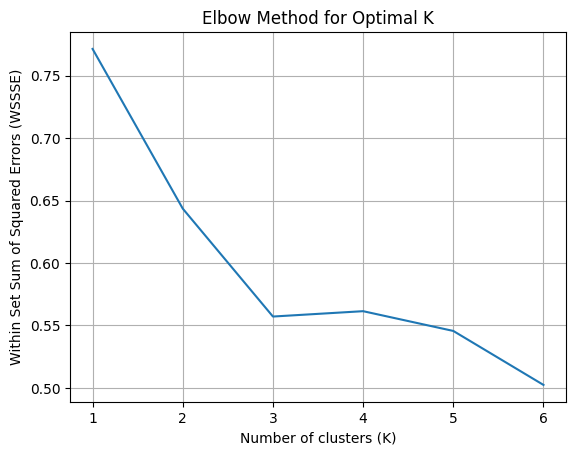

In [ ]:
plt.plot(range(1, 7), wssse_values)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within Set Sum of Squared Errors (WSSSE)')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [ ]:
kmeans = KMeans (k=3, featuresCol="scaled_features", predictionCol="cluster")
kmeans_model  = kmeans.fit(data_df)

# Assigning the data points to clusters

clustered_data = kmeans_model.transform(data_df)

In [ ]:
output = KMeans_fit.transform(data_df)
wssse = evaluator.evaluate(output)
print (f"Within Set Sum of Squared Errors (WSSSE) = {wssse}")

Within Set Sum of Squared Errors (WSSSE) = 0.5024150071528196


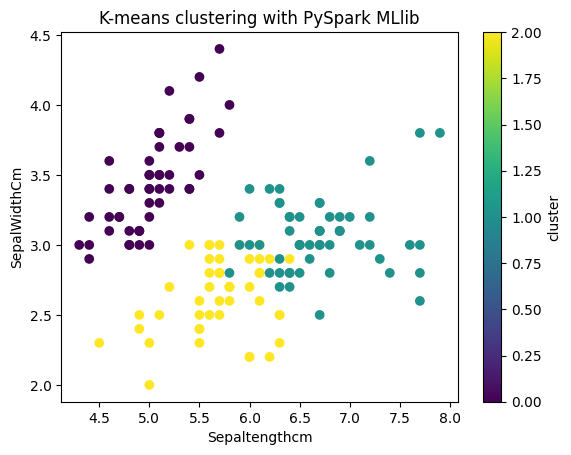

In [ ]:
# Converting to Pandas DataFrame
clustered_data_pd = clustered_data.toPandas()

#Visualizing the results
plt.scatter (clustered_data_pd[ "SepalLengthCm"], clustered_data_pd["SepalWidthCm"], c=clustered_data_pd["cluster"], cmap='viridis')
plt.xlabel("Sepaltengthcm")
plt.ylabel("SepalWidthCm")
plt.title("K-means clustering with PySpark MLlib")
plt.colorbar().set_label("cluster")
plt.show()